In [1]:
import feats_extract
fe = feats_extract.FeatsExtracter()

In [8]:
ori_path = "./测试2/原图_small"
back_path="./测试2/场景图/正面"
profile_path="./测试2/场景图/侧面"

ori_feats = fe.extract_feature(img_dir = ori_path, max_len = 1)
# with open("./ori_feats", 'wb') as f:
#     pickle.dump(ori_feats, f)
    
# back_feats = extract_feature(back_path, image_processor, model, max_len = 1)
# with open("./back_feats", 'wb') as f:
#     pickle.dump(back_feats, f)
    
# profile_feats = extract_feature(profile_path, image_processor, model, max_len = 100)
# import pickle
# with open("./profile_feats", 'wb') as f:
#     pickle.dump(profile_feats, f)

extracting feats of ./测试2/原图_small\1.png


In [3]:
ori_feats = fe.load_feats("./ori_feats")
back_feats = fe.load_feats("./back_feats")
profile_feats = fe.load_feats("./profile_feats")

In [4]:
train_data_path =  "./embd_data.csv"
# train_data = gen_data(ori_feats, back_feats, data_path = train_data_path)

In [5]:
# prepare the data
from base_model import MLP
from base_model import train_model, predict, cal_score, prepare_data, cal_score
train_dl, test_dl = prepare_data(train_data_path)
n_inputs = 1536
model = MLP(n_inputs)
# train the model
train_model(train_dl, model)

In [10]:
model

MLP(
  (hidden1): Linear(in_features=1536, out_features=128, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=128, out_features=16, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=16, out_features=1, bias=True)
  (hidden4): Linear(in_features=2, out_features=1, bias=True)
  (act3): Sigmoid()
)

In [ ]:
MODEL_PATH = "./model.pt" 
torch.save(model, MODEL_PATH)

In [ ]:
r_model = torch.load(MODEL_PATH)
r_model.eval()

In [6]:
from feats_extract import get_one_feats, get_group_feats, show_result
f_ori = get_one_feats("1.png", ori_feats)
f_back = get_group_feats("./测试2/场景图/正面", back_feats)

In [10]:
from base_model import cal_score

result = cal_score(model, f_ori, f_back)

torch.Size([15, 1536])


In [55]:
from PIL import Image
import matplotlib.pyplot as plt
import os
def show_result(ori_result, back_result, ori_path, back_path):
    plt.figure()
    fig, axs = plt.subplots(1, 4, figsize=(25, 15))
    i = 1
    image = Image.open(os.path.join(ori_path, ori_result))
    plt.subplot(1, 4, i)
    plt.imshow(image)
    i = i + 1
    
    for r in back_result:
        image = Image.open(os.path.join(back_path, r))
        plt.subplot(1, 4, i)
        i = i + 1
        plt.imshow(image)

In [34]:
ori_n = ""
back_n = []
for i in result:
    ori_n = i
    for j in result[i]:
        back_n.append(j[0])

In [36]:
ori_path = "./测试2/原图_small"
back_path="./测试2/场景图/正面"
profile_path="./测试2/场景图/侧面"

<Figure size 640x480 with 0 Axes>

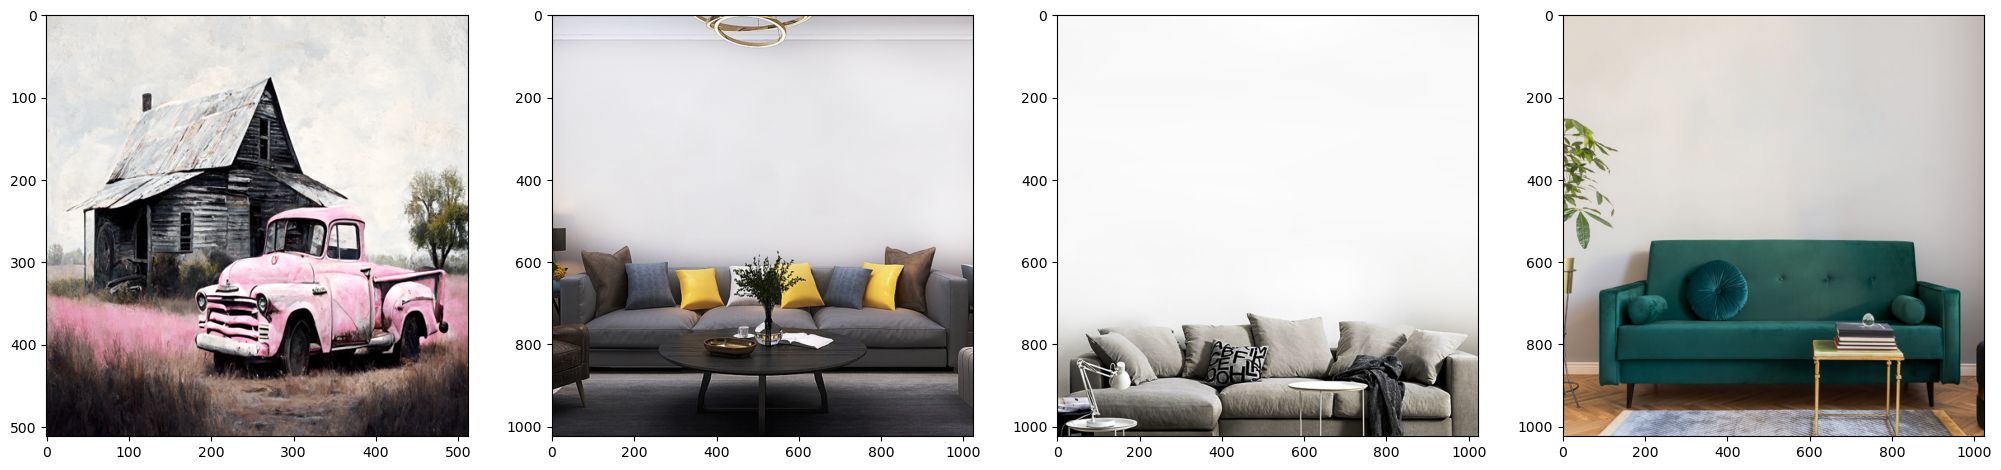

In [56]:
show_result(ori_n, back_n, ori_path, back_path)